<a href="https://colab.research.google.com/github/grawoods/teamA-grebes-NMA2020/blob/master/shuffle_correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reproduce Stringer et al. 2019, Fig. 1C with NMA subset data


Pairwise correlations were computed after binning activity at 1.2 to 1.3 s (three or four frames respectively for 12 and 10 plane recordings; 1.2-s bins for Neuropixels recordings). To compute shuffled correlations (Fig. 1C), we circularly shifted each neuron’s activity in time by a random number of bins (at least ±1000) and correlated all the shifted traces with all the original traces.

In [1]:
import numpy as np
from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True
%config InlineBackend.figure_format = 'retina'

## Data retrieval

In [2]:
import os, requests

fname = "stringer_spontaneous.npy"
url = "https://osf.io/dpqaj/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

## Data loading

In [3]:
import numpy as np
dat = np.load('stringer_spontaneous.npy', allow_pickle=True).item()
print(dat.keys())

dict_keys(['sresp', 'run', 'beh_svd_time', 'beh_svd_mask', 'stat', 'pupilArea', 'pupilCOM', 'xyz'])


## Shuffle each cell 1 time in a random amount from 1000 to the max number of time bins

In [4]:
X = dat['sresp'].copy()
cells,time = dat['sresp'].shape
for i in range(cells):
  X[i,:] = np.roll(X[i,:],np.random.randint(1000, time))

## get correlations from original and shuffled

In [5]:
cor = np.corrcoef(dat['sresp'])
cor_shuff = np.corrcoef(X)

## Only keep lower triangle of correlation matrix

In [6]:
il1 = np.tril_indices(len(cor),-1)

cor_lower = cor[il1]
cor_lower_shuff = cor_shuff[il1]

## Bin data from -0.3 to 0.75 and plot

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


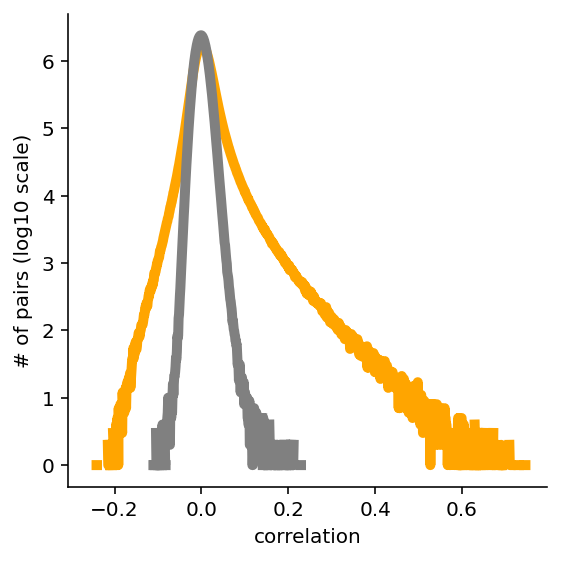

In [7]:
bins = np.arange(-0.3,0.75,0.001)
hist, edges = np.histogram(cor_lower,bins, density=False)
hist_2, edges = np.histogram(cor_lower_shuff,bins, density=False)

plt.figure(figsize=(4,4))
plt.plot(bins[0:-1] + (0.001 / 2), np.log10(hist),color='orange',linewidth=5)
plt.plot(bins[0:-1] + (0.001 / 2), np.log10(hist_2),color='grey',linewidth=5)
plt.xlabel('correlation')
plt.ylabel('# of pairs (log10 scale)')
plt.show()